In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from datetime import datetime, timedelta

In [2]:
#1

df = pd.read_csv("charleston.csv", delimiter=',')
df

,year,sea_level
0,1921.7917,7033
1,1921.8750,6939
2,1921.9583,6893
3,1922.0417,6768
4,1922.1250,6853
...,...,...
1222,2023.6250,7265
1223,2023.7083,7395
1224,2023.7917,7477
1225,2023.8750,7424


In [3]:
data = df.to_numpy()

sea_lvl = data[0:,1]

print(sea_lvl)

[7033. 6939. 6893. ... 7477. 7424. 7263.]


In [4]:
years = data[0:,0]
start_date = datetime(1921, 1, 1)

#Converting decimal numbers to dates
def decimal_year_to_date(years):
    year = int(years)  #years
    fraction = years - year  #fractions of years
    days_in_year = 365
    day_of_year = int(fraction * days_in_year) + 1  #days
    
    date = datetime(year, 1, 1) + timedelta(days=day_of_year - 1)
    return date

#Converting array into dates
dates = [decimal_year_to_date(year) for year in years]


#for year, date in zip(years, dates):
   # print(f"{year} -> {date.date()}")
#len(dates)
for date in dates:
    print(date.strftime('%m/%d/%Y'))

10/16/1921
11/16/1921
12/16/1921
01/16/1922
02/15/1922
03/18/1922
04/17/1922
05/17/1922
06/17/1922
07/17/1922
08/17/1922
09/16/1922
10/16/1922
11/16/1922
12/16/1922
01/16/1923
02/15/1923
03/18/1923
04/17/1923
05/17/1923
06/17/1923
07/17/1923
08/17/1923
09/16/1923
10/16/1923
11/16/1923
12/16/1923
01/16/1924
02/15/1924
03/17/1924
04/16/1924
05/16/1924
06/16/1924
07/16/1924
08/16/1924
09/15/1924
10/15/1924
11/15/1924
12/15/1924
01/16/1925
02/15/1925
03/18/1925
04/17/1925
05/17/1925
06/17/1925
07/17/1925
08/17/1925
09/16/1925
10/16/1925
11/16/1925
12/16/1925
01/16/1926
02/15/1926
03/18/1926
04/17/1926
05/17/1926
06/17/1926
07/17/1926
08/17/1926
09/16/1926
10/16/1926
11/16/1926
12/16/1926
01/16/1927
02/15/1927
03/18/1927
04/17/1927
05/17/1927
06/17/1927
07/17/1927
08/17/1927
09/16/1927
10/16/1927
11/16/1927
12/16/1927
01/16/1928
02/15/1928
03/17/1928
04/16/1928
05/16/1928
06/16/1928
07/16/1928
08/16/1928
09/15/1928
10/15/1928
11/15/1928
12/15/1928
01/16/1929
02/15/1929
03/18/1929
04/17/1929

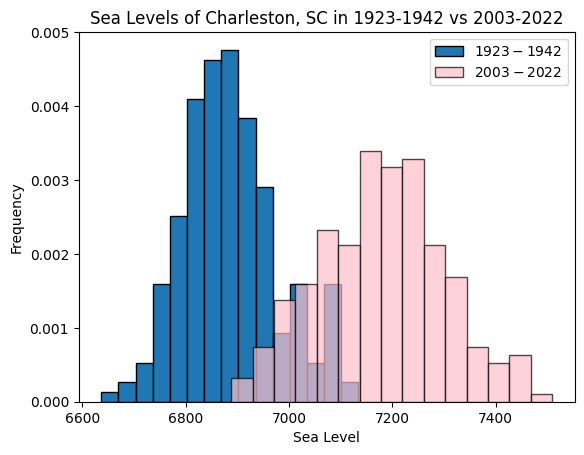

In [5]:
#2

#Sea levels for 1923-1942
min = 1923
max = 1942
e_positions = [index for index, value in enumerate(years) if min <= value <= max]
early = [sea_lvl[i] for i in e_positions]
n, bins, patches = plt.hist(early, bins=15, density=True, edgecolor='black', label = "$1923-1942$")

#Sea levels for 2003-2022
min = 2003
max = 2022
m_positions = [index for index, value in enumerate(years) if min <= value <= max]
modern = [sea_lvl[i] for i in m_positions]
n, bins, patches = plt.hist(modern, bins=15, color='pink', density=True, edgecolor='black', alpha=0.7, label = "$2003-2022$")


plt.title('Sea Levels of Charleston, SC in 1923-1942 vs 2003-2022')
plt.xlabel('Sea Level')
plt.ylabel('Frequency')
plt.legend()

In [6]:
#3

#Sea levels in May in years 1923-1942
min = 1923
max = 1942
emay_positions = [index for index, date in enumerate(dates) if date.month == 5 and min <= date.year <= max]
early_may = [sea_lvl[i] for i in emay_positions]
emay_mean = np.mean(early_may)

#Sea levels in May in years 2003-2022
min = 2003
max = 2022
mmay_positions = [index for index, date in enumerate(dates) if date.month == 5 and min <= date.year <= max]
modern_may = [sea_lvl[i] for i in mmay_positions]
#mmay_positions
mmay_mean = np.mean(modern_may)

print("Mean sea level between 1923-1942 in May: ",emay_mean)
print("Mean sea level between 2003-2022 in May: ",mmay_mean)

Mean sea level between 1923-1942 in May:  6885.95
Mean sea level between 2003-2022 in May:  7174.8


In [7]:
may_positions = [index for index, date in enumerate(dates) if date.month == 5]
may_sl = [sea_lvl[i] for i in may_positions]
may_mean = np.mean(may_sl)
may_mean

7043.607843137255

In [8]:
#4

may_positions = [index for index, date in enumerate(dates) if date.month == 5]
may_sl = [sea_lvl[i] for i in may_positions]
may_mean = np.mean(may_sl)

#t-value of May in years 1923-1942
e_n = len(early_may)
e_tval = (emay_mean - may_mean)/(np.std(early_may,ddof=1)/np.sqrt(e_n-1))

#t-value of May in years 2003-2022
m_n = len(modern_may)
m_tval = (mmay_mean - may_mean)/(np.std(modern_may,ddof=1)/np.sqrt(m_n-1))

print("t-value of sea levels between 1923-1942 in May: ",e_tval)
print("t-value of sea levels between 2003-2022 in May: ",m_tval)

t-value of sea levels between 1923-1942 in May:  -11.41252628911587
t-value of sea levels between 2003-2022 in May:  8.310535817900961


In [9]:
#5

#t-crit of May in years 1923-1942
e_tcrit = scipy.stats.t.ppf(0.95, e_n-1)

#t-crit of May in years 2003-2022
m_tcrit = scipy.stats.t.ppf(0.95, m_n-1)


print("t-crit of sea levels between 1923-1942 in May: ",e_tcrit)
print("t-crit of sea levels between 2003-2022 in May: ",m_tcrit)

t-crit of sea levels between 1923-1942 in May:  1.7291328115213673
t-crit of sea levels between 2003-2022 in May:  1.7291328115213673


In [10]:
#expected occurance of the mean sea levels of May in years 1923-1942
e_occur = 1-scipy.stats.t.cdf(e_tval,e_n-1)
e_occurance = e_occur * 100

#expected occurance of the mean sea levels of May in years 003-2022
m_occur = 1-scipy.stats.t.cdf(m_tval,m_n-1)
m_occurance = m_occur * 100

print(f"expected occurance of the mean sea levels between 1923-1942 in May: {e_occurance}%")
print(f"expected occurance of the mean sea levels between 2003-2022 in May: {m_occurance}%")

expected occurance of the mean sea levels between 1923-1942 in May: 99.99999996990393%
expected occurance of the mean sea levels between 2003-2022 in May: 4.7379518197665504e-06%
